# Machine Learning - Multiple Linear Regression


### Data source: 

*common-voice2 - Kaggle*
<br>
*https://www.kaggle.com/datasets/danielgraham1997/commonvoice2*

## Libraries and functions

In [1]:
from ipynb.fs.full.Imports_and_Functions import *

## Models

### 2. Multiple Linear Regression



In [2]:
features = ['num_onsets', 'tempo', 'onset_stren_mean',
            'dom_freq', 'sp_centroid_mean', 'sp_flattness_mean',
            'polyfeats_0_mean']

TR_85_df = TR_df.copy()
TR_85_df['median_func_num'] = gm85
TR_85_df = TR_85_df.dropna()

X = TR_85_df[features]
y = TR_85_df['median_func_num']

mlr = linear_model.LinearRegression()
mlr.fit(X, y)

mlr.score(X,y)

# pred_y = mlr.predict([[10, 10, 10, 10, 10, 10, 10]])

0.13408925853120002

### 3D Plot

*https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python*

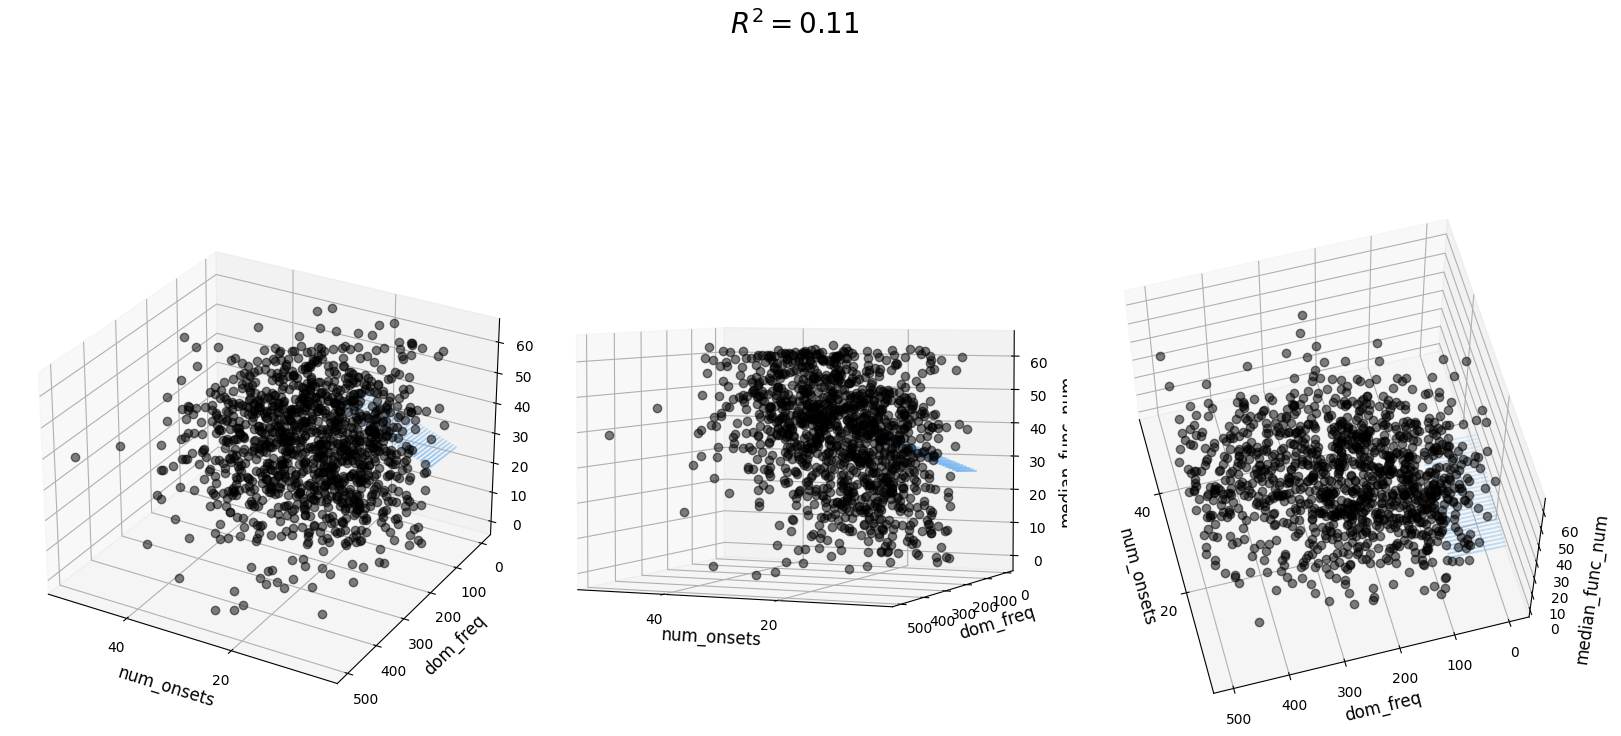

In [3]:
two_feat = ['num_onsets', 'dom_freq']

TR_85_df = TR_df.copy()
TR_85_df['median_func_num'] = gm85
TR_85_df = TR_85_df.dropna()

X = TR_85_df[two_feat].values.reshape(-1,2)
Y = TR_85_df['median_func_num']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=my_figsize)

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=my_mark_size, edgecolor='#70b3f0')
    ax.set_xlabel('num_onsets',  fontsize=12)
    ax.set_ylabel('dom_freq', fontsize=12)
    ax.set_zlabel('median_func_num', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

## Finding an optimal list of features

In [4]:
from itertools import combinations

In [5]:
# features = ['tempo_onsets', 'num_onsets', 'onset_detect_len', 'onset_stren_mean',
#             'dom_freq', 'sp_centroid_mean', 'sp_rolloff_mean', 'sp_flattness_mean']
# features = ['tempo_onsets', 'num_onsets', 'tempo', 'onset_detect_len', 'onset_detect_mean_diff', 'onset_stren_mean', 'onset_stren_median',
#             'dom_freq', 'sp_centroid_mean', 'sp_centroid_median', 'sp_rolloff_mean', 'sp_rolloff_median', 'sp_flattness_mean', 'sp_flattness_median',
#             'polyfeats_0_mean', 'polyfeats_1_mean', 'polyfeats_0_median', 'polyfeats_1_median']
features = ['tempo_onsets', 'num_onsets', 'tempo', 'onset_detect_mean_diff', 'onset_stren_mean', 
            'dom_freq', 'sp_centroid_mean', 'sp_rolloff_mean', 'sp_flattness_mean',
            'polyfeats_0_mean', 'polyfeats_1_mean']
want_pred = 'median_func_num'
df = TR_85_df
l = len(features)
R = []
for i in range(l):
    i = i+1
    r = []
    for feats in combinations(features, i):  # 1 for single, 2 for pairs, 3 for triplets, etc.
        # print(feats, "\n")
        X = df[list(feats)].values.reshape(-1,i)
        Y = df[want_pred]
        ols = linear_model.LinearRegression()
        model = ols.fit(X, Y)
        r.append(model.score(X, Y))
        rc = r.copy()
    R.append(rc)

In [6]:
Mr = []
for i in range(l):
    Mr.append(max(R[i]))
Display(Mr)
print('\n')
M = max(Mr)
print(Mr.index(M),': ', M)

0.10116449285775364
0.11772969256223009
0.13164979081296413
0.13275922977174082
0.13367556341132925
0.13413095550329213
0.1344907389595349
0.13480707215175802
0.1348502040125532
0.13486395706122745
0.13486395706122745


9 :  0.13486395706122745


There's a best pair; let's find it!

In [7]:
ind1 = R[0].index(Mr[0])
ind2 = R[1].index(Mr[1])
ind3 = R[2].index(Mr[2])

lst1 = list(combinations(features, 1))
lst2 = list(combinations(features, 2))
lst3 = list(combinations(features, 3))

Best_1 = lst1[ind1]
Best_2 = lst2[ind2]
Best_3 = lst3[ind3]

print(Best_1, Best_2, Best_3, sep='\n')

('num_onsets',)
('num_onsets', 'onset_stren_mean')
('num_onsets', 'onset_stren_mean', 'dom_freq')


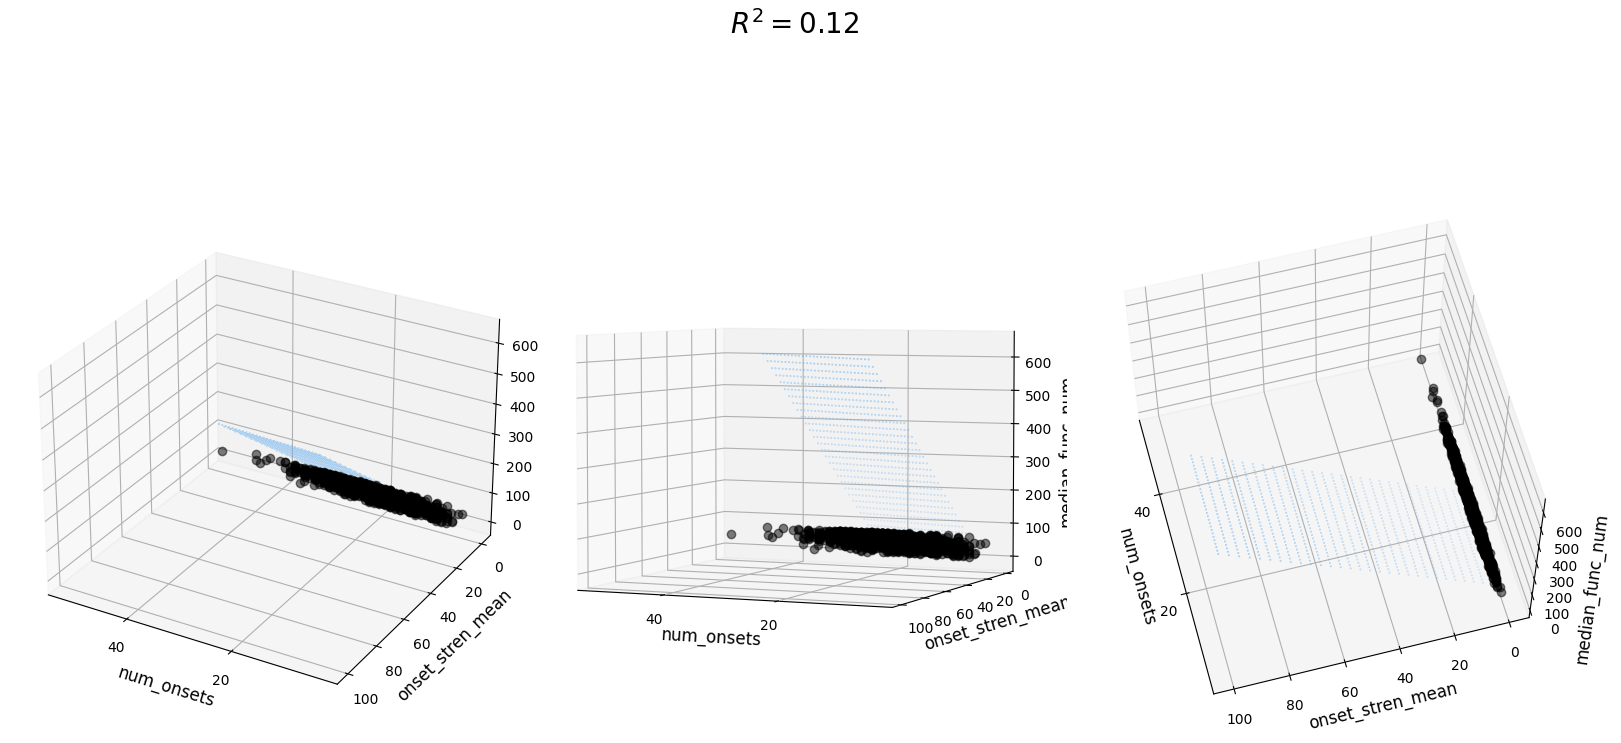

In [8]:
two_feat = ['num_onsets', 'onset_stren_mean']
want_pred = 'median_func_num'

TR_85_df = TR_df.copy()
TR_85_df[want_pred] = gm85
TR_85_df = TR_85_df.dropna()

X = TR_85_df[two_feat].values.reshape(-1,2)
Y = TR_85_df[want_pred]

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=my_figsize)

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=my_mark_size, edgecolor='#70b3f0')
    ax.set_xlabel(two_feat[0],  fontsize=12)
    ax.set_ylabel(two_feat[1], fontsize=12)
    ax.set_zlabel(want_pred, fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

___

## Scratch work
